<a href="https://colab.research.google.com/github/vm00328/vm00328_coursework_com2025/blob/master/COM2028_CW_vm00328.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [2]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 4.5MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-cp37-none-any.whl size=73053 sha256=4c5621e21bf473503c53a138af7549c98b6580f42dc4a23b3fcb717d28b91924
  Stored in directory: /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303
Successfully built kaggle
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vladislavmanolov","key":"0fce5790e620b4fe2b0ef30913bce873"}'}

In [4]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c 'uos-com2028'

 99% 816M/827M [00:05<00:00, 191MB/s]
100% 827M/827M [00:05<00:00, 152MB/s]


In [5]:
! unzip uos-com2028.zip -d COM2028_Coursework

Streaming output truncated to the last 5000 lines.
  inflating: COM2028_Coursework/train/train/5499.jpg  
  inflating: COM2028_Coursework/train/train/55.jpg  
  inflating: COM2028_Coursework/train/train/550.jpg  
  inflating: COM2028_Coursework/train/train/5500.jpg  
  inflating: COM2028_Coursework/train/train/5501.jpg  
  inflating: COM2028_Coursework/train/train/5502.jpg  
  inflating: COM2028_Coursework/train/train/5503.jpg  
  inflating: COM2028_Coursework/train/train/5504.jpg  
  inflating: COM2028_Coursework/train/train/5505.jpg  
  inflating: COM2028_Coursework/train/train/5506.jpg  
  inflating: COM2028_Coursework/train/train/5507.jpg  
  inflating: COM2028_Coursework/train/train/5508.jpg  
  inflating: COM2028_Coursework/train/train/5509.jpg  
  inflating: COM2028_Coursework/train/train/551.jpg  
  inflating: COM2028_Coursework/train/train/5510.jpg  
  inflating: COM2028_Coursework/train/train/5511.jpg  
  inflating: COM2028_Coursework/train/train/5512.jpg  
  inflating: COM20

In [6]:
#Some necessary imports that are used throughout development
import keras
import numpy as np
from numpy.random import seed
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from cv2 import cv2

from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [7]:
#Upload the data and make an array for the training dataset
from tqdm import tqdm
trained_data = [None] * 10270
savedIn = 'COM2028_Coursework/train/train'
for i in tqdm(os.listdir(savedIn)):
  path = os.path.join(savedIn,i)
  img = cv2.imread(path,cv2.IMREAD_COLOR)
  img = cv2.resize(img, (64,64))
  img = img/255
  i = i[:-4]
  trained_data[int(i)] = np.array(img)
x_train = np.array(trained_data)

#Checking the shape of x_train to make sure everything is as expected
x_train.shape

100%|██████████| 10270/10270 [00:32<00:00, 315.52it/s]


(10270, 64, 64, 3)

In [8]:
#Uploading the data annd making an array for the testing dataset
tested_pics = [None] * 15009
savedIn = 'COM2028_Coursework/test/test'
for i in tqdm(os.listdir(savedIn)):
  path = os.path.join(savedIn,i)
  img = cv2.imread(path,cv2.IMREAD_COLOR)
  img = cv2.resize(img, (64,64))
  img = img/255
  i = i[:-4]
  tested_pics[int(i)] = np.array(img)
x_test = np.array(tested_pics)

#Checking the shape of x_test to make sure everything is as expected
x_test.shape

100%|██████████| 15009/15009 [00:46<00:00, 319.70it/s]


(15009, 64, 64, 3)

In [9]:
example = "COM2028_Coursework/train.txt"
file = open(example, "r")
lines = file.readlines()
target = []
for line in lines:
  for n in line.split()[1:]:
    target.append(int(n))
y_train = np.array(target)
print(y_train)

[ 5 21 18 ...  7  7  7]


In [10]:
from keras. utils import to_categorical
y_train = to_categorical(y_train)
y_train.shape

(10270, 23)

In [11]:
imgGenerator = ImageDataGenerator(
    shear_range = 0.25,
    zoom_range = 0.25,
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # dimesion reduction
    rotation_range=5,  # randomly rotate images in the range 5 degrees
    width_shift_range=0.1,  # randomly shift images horizontally 10%
    height_shift_range=0.1,  # randomly shift images vertically 10%
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True)  # randomly flip images


imgGenerator.fit(x_train)

#Splitting the data into a training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, random_state=42, test_size=0.02)

In [12]:
#Building the model
model = Sequential()
model.add(Convolution2D(64, kernel_size = 3, activation='relu', input_shape=(64,64,3)))
model.add(Convolution2D(64, kernel_size = 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.2))
#model.add(Dense(64, activation='relu'))

model.add(Convolution2D(64, kernel_size = 3, activation='relu'))
model.add(Convolution2D(64, kernel_size = 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.3))
#model.add(Dense(64, activation='relu'))

model.add(Convolution2D(128, kernel_size = 3, activation='relu'))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(23, activation='softmax'))

In [13]:
#Setting the learning rate to a small value
learning_rate = 0.005
optimizer = keras.optimizers.Adam(learning_rate = learning_rate)
accuracy = keras.metrics.CategoricalAccuracy()

#Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Printing a summary of the model for vizualization purposes
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 20, 20, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0

In [14]:
#Fitting the model
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=40, batch_size=64)

Epoch 1/40
158/158 [==============================] - 38s 29ms/step - loss: 2.7226 - accuracy: 0.1926 - val_loss: 2.4322 - val_accuracy: 0.2427
Epoch 2/40
158/158 [==============================] - 4s 23ms/step - loss: 2.3028 - accuracy: 0.3253 - val_loss: 2.1061 - val_accuracy: 0.3398
Epoch 3/40
158/158 [==============================] - 4s 23ms/step - loss: 2.0308 - accuracy: 0.3953 - val_loss: 1.9702 - val_accuracy: 0.4175
Epoch 4/40
158/158 [==============================] - 4s 23ms/step - loss: 1.8901 - accuracy: 0.4288 - val_loss: 1.7959 - val_accuracy: 0.4709
Epoch 5/40
158/158 [==============================] - 4s 23ms/step - loss: 1.7835 - accuracy: 0.4522 - val_loss: 1.6774 - val_accuracy: 0.4709
Epoch 6/40
158/158 [==============================] - 4s 23ms/step - loss: 1.6977 - accuracy: 0.4736 - val_loss: 1.7454 - val_accuracy: 0.4951
Epoch 7/40
158/158 [==============================] - 4s 23ms/step - loss: 1.5899 - accuracy: 0.5149 - val_loss: 1.5810 - val_accuracy: 0.509

In [15]:
loss_and_metrics = model.evaluate(X_test, Y_test, verbose=2)
print("Test Loss:", loss_and_metrics[0])
# Evaluating the model accuracy in percents
print("Model Accuracy:", loss_and_metrics[1] * 100, "%")

7/7 - 0s - loss: 1.2032 - accuracy: 0.6650
Test Loss: 1.2032190561294556
Model Accuracy: 66.50485396385193 %


In [21]:
# Making a prediction of the validation data
y_pred_val = model.predict(x_test)

y_pred = np.argmax(model.predict(x_test), axis=-1)
y_pred_val=np.argmax(y_pred_val,axis=-1)
print(len(y_pred))

#Printing the first element of y_pred
y_pred[0]

15009


13

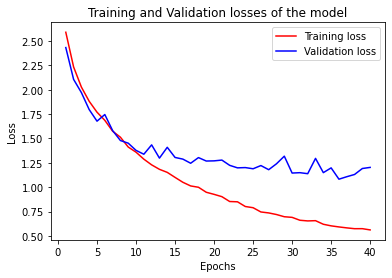

In [22]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,41)
plt.plot(epochs, loss_train,'r', label='Training loss')
plt.plot(epochs, loss_val,'b', label='Validation loss')
plt.title('Training and Validation losses of the model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

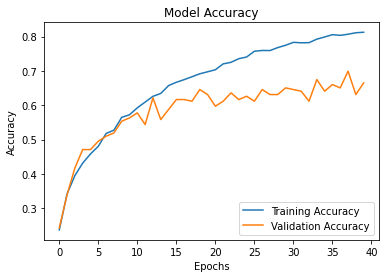

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.show()

In [19]:
model.save('my_model.h5')

In [23]:
#Defining confusion matrix
import itertools
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_pred, y_pred=y_pred_val)

Confusion matrix, without normalization
[[ 119    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0  717    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0  848    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0    0  234    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0    0    0  113    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0  330    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0  758    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0 2193    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]


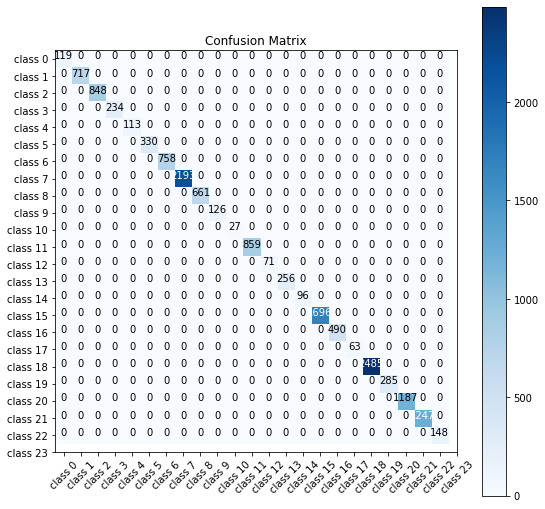

In [29]:
#Creating a confusion matrix function for visualisation purposes

cm_plot_labels = ["class 0","class 1","class 2","class 3","class 4","class 5","class 6","class 7","class 8","class 9","class 10","class 11","class 12","class 13","class 14","class 15","class 16","class 17","class 18","class 19","class 20","class 21","class 22","class 23"]

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):

    plt.figure(figsize=(9, 9))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
       print('Confusion matrix, without normalization')
 
    print(cm)
 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white"if cm[i, j] > thresh else"black")
 
#plt.tight_layout()
#plt.ylabel('True label')
#plt.xlabel('Classes')

#Plotting the confusion matrix
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
#Creating ther .csv file
col = pd.read_csv("COM2028_Coursework/submission_sample.csv")
col["label"] = y_pred
col.to_csv("COM2028_Coursework/vm00328_CW_AI.csv", index=False)